In [1]:
import pandas as pd
import numpy as np

In [2]:
education = pd.read_csv('combined_csv.csv')

In [3]:
education.head()

,Newspaper,Heading,Date,Time,URL
0,Hindiustan Times,"KEAM Result 2019: Engineering, Pharmacy entran...",2019-05-22,12:53:00,https://www.hindustantimes.com/education/keam-...
1,Hindiustan Times,Rajasthan Board RBSE 12th arts result 2019 dec...,2019-05-22,15:19:00,https://www.hindustantimes.com/education/rajas...
2,Hindiustan Times,"RBSE 12th arts result 2019 declared, check you...",2019-05-22,15:19:00,https://www.hindustantimes.com/education/rbse-...
3,Hindiustan Times,"No taker, Bhagalpur varsity drops PG course in...",2019-05-22,18:14:00,https://www.hindustantimes.com/education/no-ta...
4,Hindiustan Times,NIOS D.El.Ed 4th Semester Result 2019 declared...,2019-05-22,17:33:00,https://www.hindustantimes.com/education/nios-...


In [4]:
education['Heading'][1]

'Rajasthan Board RBSE 12th arts result 2019 declared, here’s the direct link to check marks'

In [5]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import TruncatedSVD

In [6]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stopset = set(stopwords.words('english'))

In [8]:
#### Delete This
#from sklearn.datasets import fetch_20newsgroups
#categories = ['rec.sport.baseball']
#dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=42, categories=categories)
#corpus=dataset.data


In [9]:
df=education[education['Date']=='2019-05-22']

In [10]:
Heading = df['Heading']

Tokenizing and Stemming

In [11]:
import nltk
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [13]:
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [14]:
tokenize_only('Rajasthan Board RBSE 12th arts result 2019 declared, here’s the direct link to check marks')

['rajasthan',
 'board',
 'rbse',
 '12th',
 'arts',
 'result',
 'declared',
 'here',
 's',
 'the',
 'direct',
 'link',
 'to',
 'check',
 'marks']

In [15]:
tokenize_and_stem('Rajasthan Board RBSE 12th arts result 2019 declared, here’s the direct link to check marks')

['rajasthan',
 'board',
 'rbse',
 '12th',
 'art',
 'result',
 'declar',
 'here',
 's',
 'the',
 'direct',
 'link',
 'to',
 'check',
 'mark']

In [16]:

Heading_stemmed = []
Heading_tokenized = []
for i in Heading:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'Heading', tokenize/stem
    Heading_stemmed.extend(allwords_stemmed) #extend the 'Heading_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Heading_tokenized.extend(allwords_tokenized)

In [17]:
Heading_tokenized

['keam',
 'result',
 'engineering',
 'pharmacy',
 'entrance',
 'score',
 'published',
 'here',
 's',
 'direct',
 'link',
 'to',
 'check',
 'rajasthan',
 'board',
 'rbse',
 '12th',
 'arts',
 'result',
 'declared',
 'here',
 's',
 'the',
 'direct',
 'link',
 'to',
 'check',
 'marks',
 'rbse',
 '12th',
 'arts',
 'result',
 'declared',
 'check',
 'your',
 'rajasthan',
 'board',
 'marks',
 'at',
 'rajresults.nic.in',
 'no',
 'taker',
 'bhagalpur',
 'varsity',
 'drops',
 'pg',
 'course',
 'in',
 'angika',
 'nios',
 'd.el.ed',
 '4th',
 'semester',
 'result',
 'declared',
 'here',
 's',
 'direct',
 'link',
 'to',
 'check',
 'uppsc',
 'pcs',
 'mains',
 'just',
 'one',
 'day',
 'left',
 'to',
 'apply',
 'for',
 'the',
 'exam',
 'rajasthan',
 'board',
 'rbse',
 '12th',
 'arts',
 'result',
 'declared',
 'here',
 's',
 'the',
 'direct',
 'link',
 'to',
 'check',
 'marks',
 'rbse',
 '12th',
 'arts',
 'result',
 'declared',
 'check',
 'your',
 'rajasthan',
 'board',
 'marks',
 'at',
 'rajresults.nic.

In [18]:
Heading_stemmed

['keam',
 'result',
 'engin',
 'pharmaci',
 'entranc',
 'score',
 'publish',
 'here',
 's',
 'direct',
 'link',
 'to',
 'check',
 'rajasthan',
 'board',
 'rbse',
 '12th',
 'art',
 'result',
 'declar',
 'here',
 's',
 'the',
 'direct',
 'link',
 'to',
 'check',
 'mark',
 'rbse',
 '12th',
 'art',
 'result',
 'declar',
 'check',
 'your',
 'rajasthan',
 'board',
 'mark',
 'at',
 'rajresults.nic.in',
 'no',
 'taker',
 'bhagalpur',
 'varsiti',
 'drop',
 'pg',
 'cours',
 'in',
 'angika',
 'nio',
 'd.el.',
 '4th',
 'semest',
 'result',
 'declar',
 'here',
 's',
 'direct',
 'link',
 'to',
 'check',
 'uppsc',
 'pcs',
 'main',
 'just',
 'one',
 'day',
 'left',
 'to',
 'appli',
 'for',
 'the',
 'exam',
 'rajasthan',
 'board',
 'rbse',
 '12th',
 'art',
 'result',
 'declar',
 'here',
 's',
 'the',
 'direct',
 'link',
 'to',
 'check',
 'mark',
 'rbse',
 '12th',
 'art',
 'result',
 'declar',
 'check',
 'your',
 'rajasthan',
 'board',
 'mark',
 'at',
 'rajresults.nic.in',
 'high',
 'court',
 'seek',
 '

In [19]:
words_frame = pd.DataFrame({'words': Heading_tokenized}, index = Heading_stemmed)

In [20]:
words_frame.head(10)

,words
keam,keam
result,result
engin,engineering
pharmaci,pharmacy
entranc,entrance
score,score
publish,published
here,here
s,s
direct,direct


TF-IDF

In [21]:
##Important : min_df
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

In [22]:
tfidf_matrix = vectorizer.fit_transform(Heading)

In [23]:
print(tfidf_matrix.shape)

(55, 749)


In [24]:
print(tfidf_matrix[0])

  (0, 363)	0.187324067301381
  (0, 557)	0.07421976381828795
  (0, 277)	0.2021327858842937
  (0, 462)	0.187324067301381
  (0, 280)	0.2021327858842937
  (0, 621)	0.17583753278485234
  (0, 488)	0.2021327858842937
  (0, 603)	0.14558063414274716
  (0, 245)	0.14015709762262274
  (0, 378)	0.14015709762262274
  (0, 164)	0.10990019898051755
  (0, 364)	0.187324067301381
  (0, 584)	0.2021327858842937
  (0, 278)	0.2021327858842937
  (0, 463)	0.2021327858842937
  (0, 281)	0.2021327858842937
  (0, 623)	0.2021327858842937
  (0, 489)	0.2021327858842937
  (0, 606)	0.16645235072206407
  (0, 246)	0.14558063414274716
  (0, 379)	0.16645235072206407
  (0, 366)	0.2021327858842937
  (0, 585)	0.2021327858842937
  (0, 279)	0.2021327858842937
  (0, 464)	0.2021327858842937
  (0, 282)	0.2021327858842937
  (0, 624)	0.2021327858842937
  (0, 490)	0.2021327858842937
  (0, 607)	0.16645235072206407
  (0, 247)	0.16645235072206407


In [25]:
vectorizer.get_feature_names()[:10]

["'s",
 "'s bhawna",
 "'s bhawna complet",
 "'s direct",
 "'s direct link",
 '10th',
 '10th 12th',
 '10th 12th result',
 '10th result',
 '10th result bseodisha.nic.in']

In [26]:
terms = vectorizer.get_feature_names()

Cosine similarity

In [27]:
from sklearn.metrics.pairwise import cosine_similarity


In [28]:
dist = 1 - cosine_similarity(tfidf_matrix)

In [29]:
dist.shape

(55, 55)

In [30]:
print(dist)

[[ 0.00000000e+00  7.55919797e-01  9.78311711e-01 ...  9.93343086e-01
   9.93585646e-01  9.77854036e-01]
 [ 7.55919797e-01 -2.22044605e-16  6.15136897e-01 ...  9.54123697e-01
   9.60685592e-01  9.74270777e-01]
 [ 9.78311711e-01  6.15136897e-01 -4.44089210e-16 ...  9.51303351e-01
   9.58268654e-01  9.72689017e-01]
 ...
 [ 9.93343086e-01  9.54123697e-01  9.51303351e-01 ... -6.66133815e-16
   9.92248482e-01  9.11216486e-01]
 [ 9.93585646e-01  9.60685592e-01  9.58268654e-01 ...  9.92248482e-01
  -6.66133815e-16  9.91922723e-01]
 [ 9.77854036e-01  9.74270777e-01  9.72689017e-01 ...  9.11216486e-01
   9.91922723e-01 -4.44089210e-16]]


In [31]:
print(dist[0])

[0.         0.7559198  0.97831171 1.         0.74900494 1.
 0.7559198  0.97831171 0.98138647 1.         0.96528514 0.99168031
 0.         0.97999774 1.         0.98217226 0.99385816 1.
 0.99427078 0.99521202 1.         0.99398331 0.98440642 0.9926326
 0.96470521 0.98128257 0.99495884 0.97855605 0.98568873 0.99296481
 0.99535333 0.95472157 0.97690671 0.97246329 0.9881375  0.99141655
 0.99313788 1.         1.         1.         1.         0.97785404
 0.96650764 1.         1.         1.         0.98933095 0.99358565
 0.99334309 0.92157915 0.81465819 0.92157915 0.99334309 0.99358565
 0.97785404]


## K-Means

In [32]:
from sklearn.cluster import KMeans


In [33]:
num_clusters = 15
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
clusters = km.labels_.tolist()
clusters[:5]

[2, 1, 11, 5, 4]

In [35]:
from sklearn.externals import joblib
joblib.dump(km,  'doc_cluster.pkl')


['doc_cluster.pkl']

In [36]:
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [37]:
df['Cluster'] = clusters

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
X_dist = km.transform(tfidf_matrix)**2  ###tranform returns distance from centroid
sqddist = X_dist.sum(axis=1).round(2)
df['sqddist'] = sqddist

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
df.head()


,Newspaper,Heading,Date,Time,URL,Cluster,sqddist
0,Hindiustan Times,"KEAM Result 2019: Engineering, Pharmacy entran...",2019-05-22,12:53:00,https://www.hindustantimes.com/education/keam-...,2,21.35
1,Hindiustan Times,Rajasthan Board RBSE 12th arts result 2019 dec...,2019-05-22,15:19:00,https://www.hindustantimes.com/education/rajas...,1,20.77
2,Hindiustan Times,"RBSE 12th arts result 2019 declared, check you...",2019-05-22,15:19:00,https://www.hindustantimes.com/education/rbse-...,11,21.62
3,Hindiustan Times,"No taker, Bhagalpur varsity drops PG course in...",2019-05-22,18:14:00,https://www.hindustantimes.com/education/no-ta...,5,22.76
4,Hindiustan Times,NIOS D.El.Ed 4th Semester Result 2019 declared...,2019-05-22,17:33:00,https://www.hindustantimes.com/education/nios-...,4,21.00


In [40]:
df['sqddist'].mean()

21.996545454545455

In [41]:
df['sqddist'].std()

0.6661587459063154

In [42]:
df[df['sqddist']>df['sqddist'].mean()+df['sqddist'].std()/2]

,Newspaper,Heading,Date,Time,URL,Cluster,sqddist
3,Hindiustan Times,"No taker, Bhagalpur varsity drops PG course in...",2019-05-22,18:14:00,https://www.hindustantimes.com/education/no-ta...,5,22.76
5,Hindiustan Times,UPPSC PCS Mains 2018: Just one day left to app...,2019-05-22,17:21:00,https://www.hindustantimes.com/education/uppsc...,10,22.59
8,Hindiustan Times,High court seeks DU’s reply over games removed...,2019-05-22,14:14:00,https://www.hindustantimes.com/education/high-...,1,22.92
9,Hindiustan Times,CBSE asks DU to align admissions schedule with...,2019-05-22,14:05:00,https://www.hindustantimes.com/education/cbse-...,12,22.61
10,Hindiustan Times,RBSE 12th arts result 2019 live: Geeta Jaipal ...,2019-05-22,16:43:00,https://www.hindustantimes.com/education/rbse-...,11,22.46
13,Hindiustan Times,"Week after protests, St Stephen’s to begin adm...",2019-05-22,09:44:00,https://www.hindustantimes.com/education/week-...,12,22.51
53,Indian Express,"Delhi university’s new UG curriculum ready, va...",2019-05-22,8:00:28 pm,https://indianexpress.com/article/education/de...,5,22.71
55,Indian Express,From small hut to stars: Tripura-boy among TBS...,2019-05-22,6:32:25 pm,https://indianexpress.com/article/education/fr...,13,22.84
57,Indian Express,Rajasthan Board Class 12th Arts result worse t...,2019-05-22,4:55:12 pm,https://indianexpress.com/article/education/ra...,11,22.65
62,Indian Express,LiveRBSE Rajastha 12th Arts results 2019 @rajr...,2019-05-22,4:00:16 pm,https://indianexpress.com/article/education/rb...,11,22.71


In [43]:
df['Cluster'].value_counts()

11    11
1      6
4      5
13     4
5      4
3      4
12     3
10     3
6      3
2      3
0      3
14     2
9      2
8      1
7      1
Name: Cluster, dtype: int64

In [44]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [45]:
cluster_colors = {0: '#1f2df4', 1: '#b3b6c9', 2: '#4ad9ec', 3: '#5e97b9', 4: '#1a7903',
                  5: '#add920', 6: '#cfa5e1', 7: '#2c2255', 8: '#8b0964', 9: '#eb3bdf',
                  10: '#0fcb43', 11: '#cfc0a7', 12: '#4f94bf', 13: '#9d9ce3', 14: '#da7c07'}
cluster_names = {0: 'Cluster 0', 
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4',
                 5: 'Cluster 5',
                 6: 'Cluster 6',
                 7: 'Cluster 7',
                 8: 'Cluster 8',
                 9: 'Cluster 9',
                 10:'Cluster 10',
                 11:'Cluster 11',
                 12:'Cluster 12',
                 13:'Cluster 13',
                 14:'Cluster 14'}

In [46]:
%matplotlib inline 
df_plot= pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=Heading)) 
df_plot.head()

,x,y,label,title
0,0.517718,-0.301575,2,"KEAM Result 2019: Engineering, Pharmacy entran..."
1,0.052641,-0.134874,1,Rajasthan Board RBSE 12th arts result 2019 dec...
2,-0.133277,0.088763,11,"RBSE 12th arts result 2019 declared, check you..."
3,0.525767,0.556314,5,"No taker, Bhagalpur varsity drops PG course in..."
4,0.283028,-0.425523,4,NIOS D.El.Ed 4th Semester Result 2019 declared...


In [47]:
groups = df_plot.groupby('label')

C:\Users\drago\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


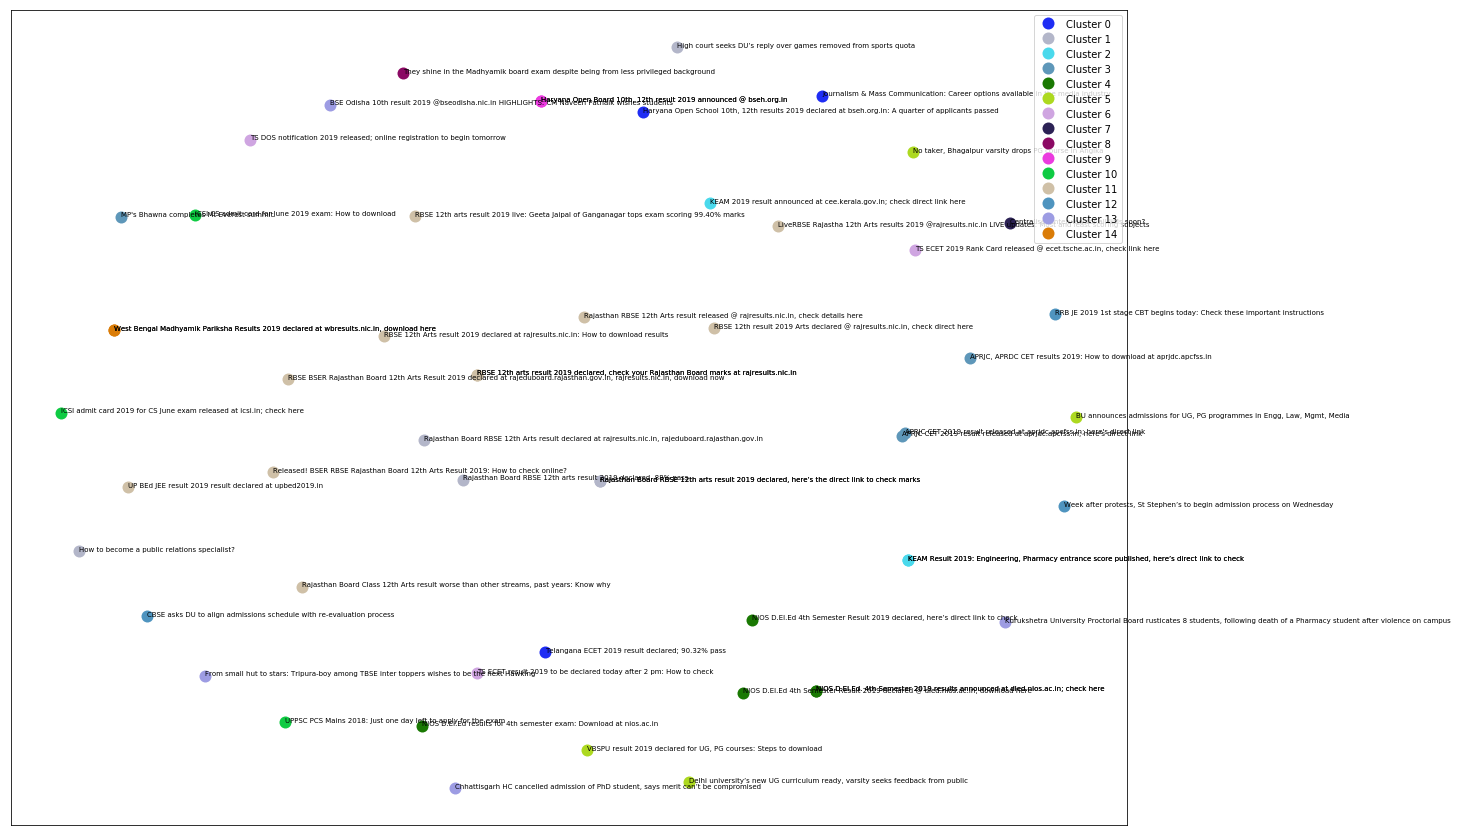

In [48]:
fig, ax = plt.subplots(figsize=(20, 15))

for name,group in groups:
    ax.plot(group.x, group.y, marker='o',linestyle='',ms=12, label=cluster_names[name],color=cluster_colors[name],mec='none')
    ax.set_aspect('auto')   
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend(numpoints=1)

for i in range(len(df_plot)):
    ax.text(df_plot.iloc[i]['x'], df_plot.iloc[i]['y'], df_plot.iloc[i]['title'], size=7)

### Closest Point to Centroid

In [49]:
#centers = np.array(km.cluster_centers_)

In [50]:
#data_99 = [ j for j, cluster in enumerate(clusters) if cluster == 1 ]


In [51]:
#cluster_tf_matrix = np.zeros( (  len(data_99) , centers.shape[1] ) )
#cluster_tf_matrix

In [52]:
#for row_num, data in enumerate(data_99):
 #       row = tfidf_matrix[data]
  #      cluster_tf_matrix[row_num] = row

In [53]:
#clostest_data = []
#for i in range(num_clusters):
 #   center = centers[i]
  #  data_i = [ j for j, cluster in enumerate(clusters) if cluster == i ]
    
    
   # cluster_tf_matrix = np.zeros( (  len(data_i) , centers.shape[1] ) )
    #for row_num, data in enumerate(data_i):
     #   row = tfidf_matrix[data]
      #  cluster_tf_matrix[row_num] = row

## Final Result

In [54]:
df.head()

,Newspaper,Heading,Date,Time,URL,Cluster,sqddist
0,Hindiustan Times,"KEAM Result 2019: Engineering, Pharmacy entran...",2019-05-22,12:53:00,https://www.hindustantimes.com/education/keam-...,2,21.35
1,Hindiustan Times,Rajasthan Board RBSE 12th arts result 2019 dec...,2019-05-22,15:19:00,https://www.hindustantimes.com/education/rajas...,1,20.77
2,Hindiustan Times,"RBSE 12th arts result 2019 declared, check you...",2019-05-22,15:19:00,https://www.hindustantimes.com/education/rbse-...,11,21.62
3,Hindiustan Times,"No taker, Bhagalpur varsity drops PG course in...",2019-05-22,18:14:00,https://www.hindustantimes.com/education/no-ta...,5,22.76
4,Hindiustan Times,NIOS D.El.Ed 4th Semester Result 2019 declared...,2019-05-22,17:33:00,https://www.hindustantimes.com/education/nios-...,4,21.00


In [55]:
dist_mean=df['sqddist'].mean()
dist_std=df['sqddist'].std()

In [56]:
df_less = df[df['sqddist']<dist_mean+dist_std] 

In [57]:
df_less.head()

,Newspaper,Heading,Date,Time,URL,Cluster,sqddist
0,Hindiustan Times,"KEAM Result 2019: Engineering, Pharmacy entran...",2019-05-22,12:53:00,https://www.hindustantimes.com/education/keam-...,2,21.35
1,Hindiustan Times,Rajasthan Board RBSE 12th arts result 2019 dec...,2019-05-22,15:19:00,https://www.hindustantimes.com/education/rajas...,1,20.77
2,Hindiustan Times,"RBSE 12th arts result 2019 declared, check you...",2019-05-22,15:19:00,https://www.hindustantimes.com/education/rbse-...,11,21.62
4,Hindiustan Times,NIOS D.El.Ed 4th Semester Result 2019 declared...,2019-05-22,17:33:00,https://www.hindustantimes.com/education/nios-...,4,21.00
5,Hindiustan Times,UPPSC PCS Mains 2018: Just one day left to app...,2019-05-22,17:21:00,https://www.hindustantimes.com/education/uppsc...,10,22.59


In [58]:
Result = df_less.sort_values('Cluster').groupby(['Cluster']).first() ## picking 1 out of each cluster having mean+std/2 < centroid 


In [59]:
Result.head()


,Newspaper,Heading,Date,Time,URL,sqddist
Cluster,,,,,,
0,Time of India,Telangana ECET 2019 result declared; 90.32% pass,2019-05-22,19:02:00,https://timesofindia.indiatimes.com/home/educa...,21.92
1,Hindiustan Times,Rajasthan Board RBSE 12th arts result 2019 dec...,2019-05-22,15:19:00,https://www.hindustantimes.com/education/rajas...,20.77
2,Hindiustan Times,"KEAM Result 2019: Engineering, Pharmacy entran...",2019-05-22,12:53:00,https://www.hindustantimes.com/education/keam-...,21.35
3,Time of India,APRJC CET 2019 result released at aprjdc.apcfs...,2019-05-22,09:07:00,https://timesofindia.indiatimes.com/home/educa...,21.77
4,Time of India,NIOS D.El.Ed. 4th Semester 2019 results announ...,2019-05-22,16:37:00,https://timesofindia.indiatimes.com/home/educa...,21.58


In [60]:
Result = pd.DataFrame.reset_index(Result)

In [261]:
Result.head()

,Cluster,Newspaper,Heading,Date,Time,URL,sqddist
0,1,Indian Express,Released! BSER RBSE Rajasthan Board 12th Arts ...,2019-05-22,8:08:09 pm,https://indianexpress.com/article/education/ra...,21.89
1,2,Indian Express,"APRJC, APRDC CET results 2019: How to download...",2019-05-22,11:31:49 am,https://indianexpress.com/article/education/ma...,20.70
2,3,Hindiustan Times,"KEAM Result 2019: Engineering, Pharmacy entran...",2019-05-22,12:53:00,https://www.hindustantimes.com/education/keam-...,21.00
3,4,Time of India,APRJC CET 2019 result released at aprjdc.apcfs...,2019-05-22,09:07:00,https://timesofindia.indiatimes.com/home/educa...,21.18
4,5,Time of India,"Haryana Open Board 10th, 12th result 2019 anno...",2019-05-22,09:30:00,https://timesofindia.indiatimes.com/home/educa...,21.46


In [61]:
df_more = df[df['sqddist']>df['sqddist'].mean()+df['sqddist'].std()/2] 

,Newspaper,Heading,Date,Time,URL,Cluster,sqddist
3,Hindiustan Times,"No taker, Bhagalpur varsity drops PG course in...",2019-05-22,18:14:00,https://www.hindustantimes.com/education/no-ta...,5,22.76
5,Hindiustan Times,UPPSC PCS Mains 2018: Just one day left to app...,2019-05-22,17:21:00,https://www.hindustantimes.com/education/uppsc...,10,22.59
8,Hindiustan Times,High court seeks DU’s reply over games removed...,2019-05-22,14:14:00,https://www.hindustantimes.com/education/high-...,1,22.92
9,Hindiustan Times,CBSE asks DU to align admissions schedule with...,2019-05-22,14:05:00,https://www.hindustantimes.com/education/cbse-...,12,22.61
10,Hindiustan Times,RBSE 12th arts result 2019 live: Geeta Jaipal ...,2019-05-22,16:43:00,https://www.hindustantimes.com/education/rbse-...,11,22.46
13,Hindiustan Times,"Week after protests, St Stephen’s to begin adm...",2019-05-22,09:44:00,https://www.hindustantimes.com/education/week-...,12,22.51
53,Indian Express,"Delhi university’s new UG curriculum ready, va...",2019-05-22,8:00:28 pm,https://indianexpress.com/article/education/de...,5,22.71
55,Indian Express,From small hut to stars: Tripura-boy among TBS...,2019-05-22,6:32:25 pm,https://indianexpress.com/article/education/fr...,13,22.84
57,Indian Express,Rajasthan Board Class 12th Arts result worse t...,2019-05-22,4:55:12 pm,https://indianexpress.com/article/education/ra...,11,22.65
62,Indian Express,LiveRBSE Rajastha 12th Arts results 2019 @rajr...,2019-05-22,4:00:16 pm,https://indianexpress.com/article/education/rb...,11,22.71


In [78]:
Result = Result.append(df_more)

C:\Users\drago\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [79]:
x=Result.reset_index()

In [83]:
x

,index,Cluster,Date,Heading,Newspaper,Time,URL,sqddist
0,0,0,2019-05-22,Telangana ECET 2019 result declared; 90.32% pass,Time of India,19:02:00,https://timesofindia.indiatimes.com/home/educa...,21.92
1,1,1,2019-05-22,Rajasthan Board RBSE 12th arts result 2019 dec...,Hindiustan Times,15:19:00,https://www.hindustantimes.com/education/rajas...,20.77
2,2,2,2019-05-22,"KEAM Result 2019: Engineering, Pharmacy entran...",Hindiustan Times,12:53:00,https://www.hindustantimes.com/education/keam-...,21.35
3,3,3,2019-05-22,APRJC CET 2019 result released at aprjdc.apcfs...,Time of India,09:07:00,https://timesofindia.indiatimes.com/home/educa...,21.77
4,4,4,2019-05-22,NIOS D.El.Ed. 4th Semester 2019 results announ...,Time of India,16:37:00,https://timesofindia.indiatimes.com/home/educa...,21.58
5,5,5,2019-05-22,"VBSPU result 2019 declared for UG, PG courses:...",Indian Express,4:21:10 pm,https://indianexpress.com/article/education/vb...,22.27
6,6,6,2019-05-22,TS ECET result 2019 to be declared today after...,Indian Express,12:13:06 pm,https://indianexpress.com/article/education/ma...,21.92
7,7,7,2019-05-22,Centralised interview for all IIMs soon?,Hindiustan Times,07:14:00,https://www.hindustantimes.com/education/centr...,21.36
8,8,8,2019-05-22,They shine in the Madhyamik board exam despite...,Time of India,18:12:00,https://timesofindia.indiatimes.com/home/educa...,21.10
9,9,9,2019-05-22,"Haryana Open Board 10th, 12th result 2019 anno...",Time of India,09:30:00,https://timesofindia.indiatimes.com/home/educa...,20.73


In [82]:
x['Heading'][24]

'LiveRBSE Rajastha 12th Arts results 2019 @rajresults.nic.in LIVE updates: Most and least scoring subjects'

In [65]:
x.drop(['index'],axis=1,inplace=True)

In [66]:
x

,Cluster,Newspaper,Heading,Date,Time,URL,sqddist
0,0,Time of India,Telangana ECET 2019 result declared; 90.32% pass,2019-05-22,19:02:00,https://timesofindia.indiatimes.com/home/educa...,21.92
1,1,Hindiustan Times,Rajasthan Board RBSE 12th arts result 2019 dec...,2019-05-22,15:19:00,https://www.hindustantimes.com/education/rajas...,20.77
2,2,Hindiustan Times,"KEAM Result 2019: Engineering, Pharmacy entran...",2019-05-22,12:53:00,https://www.hindustantimes.com/education/keam-...,21.35
3,3,Time of India,APRJC CET 2019 result released at aprjdc.apcfs...,2019-05-22,09:07:00,https://timesofindia.indiatimes.com/home/educa...,21.77
4,4,Time of India,NIOS D.El.Ed. 4th Semester 2019 results announ...,2019-05-22,16:37:00,https://timesofindia.indiatimes.com/home/educa...,21.58
5,5,Indian Express,"VBSPU result 2019 declared for UG, PG courses:...",2019-05-22,4:21:10 pm,https://indianexpress.com/article/education/vb...,22.27
6,6,Indian Express,TS ECET result 2019 to be declared today after...,2019-05-22,12:13:06 pm,https://indianexpress.com/article/education/ma...,21.92
7,7,Hindiustan Times,Centralised interview for all IIMs soon?,2019-05-22,07:14:00,https://www.hindustantimes.com/education/centr...,21.36
8,8,Time of India,They shine in the Madhyamik board exam despite...,2019-05-22,18:12:00,https://timesofindia.indiatimes.com/home/educa...,21.10
9,9,Time of India,"Haryana Open Board 10th, 12th result 2019 anno...",2019-05-22,09:30:00,https://timesofindia.indiatimes.com/home/educa...,20.73


Determining Number of Clusters using silhouette score

In [67]:
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

In [70]:
n_clusters = list (range (12,25))

In [71]:
for n in n_clusters:
    km_ss = KMeans(n_clusters=n)
    #km_ss.fit(tfidf_matrix) 
    clusters_ss = km_ss.fit_predict(tfidf_matrix)
    #centers_ss = km_ss.cluster_centers_ 
    score = silhouette_score(dist,clusters_ss)
    print ("For n = {}, silhouette score is {})".format(n, score))

For n = 12, silhouette score is 0.10121035996860489)
For n = 13, silhouette score is 0.12808118897303752)
For n = 14, silhouette score is 0.1336758121265798)
For n = 15, silhouette score is 0.15170075965964386)
For n = 16, silhouette score is 0.1443481888390342)
For n = 17, silhouette score is 0.1900619589886618)
For n = 18, silhouette score is 0.17646581467256367)
For n = 19, silhouette score is 0.21244236839409616)
For n = 20, silhouette score is 0.17389406122494164)
For n = 21, silhouette score is 0.19060136568294836)
For n = 22, silhouette score is 0.18331729598428256)
For n = 23, silhouette score is 0.1784425656062923)
For n = 24, silhouette score is 0.21163040481068096)


In [72]:
score

0.21163040481068096

In [73]:
type(dist)

numpy.ndarray

In [74]:
km_ss = KMeans(n_clusters=n)
clusters_ss = km_ss.fit_predict(dist)

X_dist = km.transform(tfidf_matrix)**2


In [75]:
X_dist.sum(axis=1).round(2)

array([21.35, 20.77, 21.62, 22.76, 21.  , 22.59, 20.77, 21.62, 22.92,
       22.61, 22.46, 21.2 , 21.35, 22.51, 21.36, 22.71, 22.2 , 22.84,
       22.01, 22.65, 22.2 , 22.27, 21.63, 21.49, 22.71, 22.23, 21.67,
       21.92, 22.63, 22.39, 22.64, 22.17, 22.06, 22.68, 22.2 , 21.92,
       21.69, 22.52, 22.82, 21.1 , 22.78, 21.58, 22.22, 23.  , 22.68,
       22.61, 22.54, 20.9 , 20.73, 21.77, 21.78, 21.77, 20.73, 20.9 ,
       21.58])

In [76]:
sqddist = pd.DataFrame(X_dist.sum(axis=1).round(2), columns=['sqdist'])


In [77]:
sqddist

,sqdist
0,21.35
1,20.77
2,21.62
3,22.76
4,21.00
5,22.59
6,20.77
7,21.62
8,22.92
9,22.61
